<div style=" padding: 40px; text-align: center; color: #535453;">
    <h2 style="font-family: 'calibri', sans-serif;ext-align: center;  font-size: 50px; margin-top: 0; margin-bottom: 20px;">
    EDA On EPA Fuel Economy
    </h2>
</div>


In this notebook, Im trying to work with `Matplotlib` and `Seaborn` and make some queries to understand the fuel economy data.

Fuel economy data are the result of vehicle testing done at the Environmental Protection Agency's National Vehicle and Fuel Emissions Laboratory in Ann Arbor, Michigan, and by vehicle manufacturers with oversight by EPA.

Hint: You'll see that `comb08` is the most important and valuable column 

<h1 style="padding-top:50px"><p style="background-color:#000;font-family:calibri;color:#FFF9ED;font-size:150%;text-align:center;border-radius:20px;width:400px;">
Importing Libraries
</p></h1>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('EPA_fuel_economy.csv')
df

,make,model,year,cylinders,trany,displ,VClass,co2,barrels08,fuelCost08,fuelType,highway08,city08,comb08
0,Acura,NSX,2000,6.0,Automatic 4-spd,3.0,Two Seaters,-1,18.311667,2600,Premium,22,15,18
1,Acura,NSX,2000,6.0,Manual 6-spd,3.2,Two Seaters,-1,18.311667,2600,Premium,22,15,18
2,BMW,M Coupe,2000,6.0,Manual 5-spd,3.2,Two Seaters,-1,17.347895,2500,Premium,23,17,19
3,BMW,Z3 Coupe,2000,6.0,Automatic 4-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19
4,BMW,Z3 Coupe,2000,6.0,Manual 5-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24205,Lamborghini,Aventador Sian Coupe,2020,12.0,Automatic (AM-S7),6.5,Two Seaters,861,32.961000,4700,Premium,14,8,10
24206,RUF Automobile,TURBO12/CTR3/CTR ANNIVERSARY,2020,6.0,Manual 7-spd,3.8,Two Seaters,497,18.311667,2600,Premium,20,16,18
24207,Kia,Soul Electric,2020,NaN,Automatic (A1),NaN,Small Station Wagons,0,0.174000,550,Electricity,101,127,114
24208,Tesla,Model X Long Range Plus,2020,NaN,Automatic (A1),NaN,Standard Sport Utility Vehicle 4WD,0,0.192000,650,Electricity,101,108,105


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24210 entries, 0 to 24209
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   make        24210 non-null  object 
 1   model       24210 non-null  object 
 2   year        24210 non-null  int64  
 3   cylinders   23979 non-null  float64
 4   trany       24201 non-null  object 
 5   displ       23980 non-null  float64
 6   VClass      24210 non-null  object 
 7   co2         24210 non-null  int64  
 8   barrels08   24210 non-null  float64
 9   fuelCost08  24210 non-null  int64  
 10  fuelType    24210 non-null  object 
 11  highway08   24210 non-null  int64  
 12  city08      24210 non-null  int64  
 13  comb08      24210 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 2.6+ MB


<h1 style="padding-top:50px"><p style="background-color:#000;font-family:calibri;color:#FFF9ED;font-size:150%;text-align:center;border-radius:20px;width:400px;">
EDA
</p></h1>

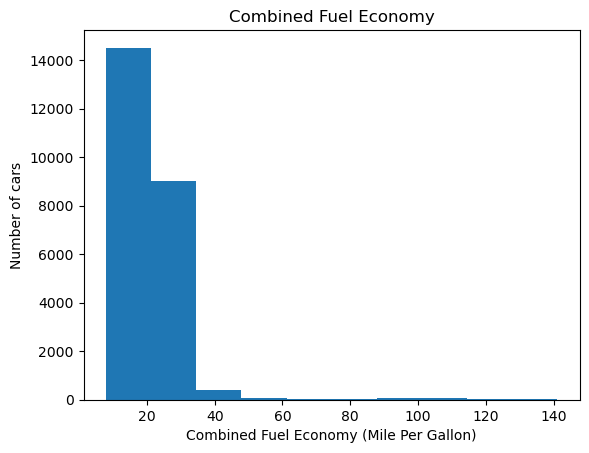

In [4]:
plt.hist(df['comb08'])
plt.xlabel('Combined Fuel Economy (Mile Per Gallon)')
plt.ylabel('Number of cars')
plt.title('Combined Fuel Economy')
plt.show()

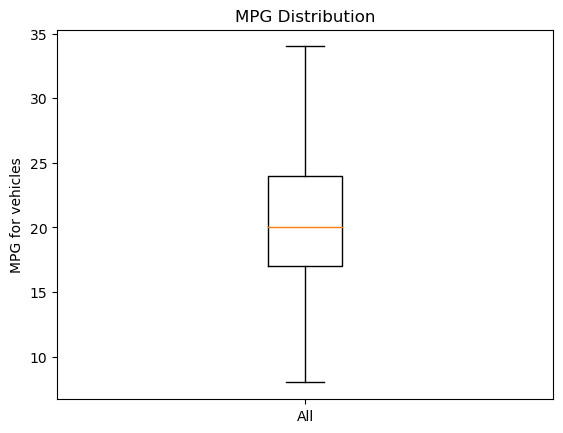

In [5]:
fig, ax = plt.subplots()
ax.boxplot(df['comb08'], labels=['All'], showfliers=False)
ax.set(title='MPG Distribution', ylabel='MPG for vehicles');

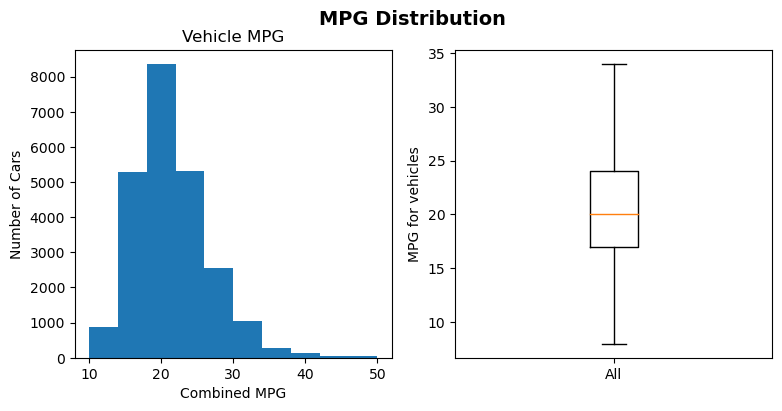

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,4))
ax1.hist(df['comb08'], range=(10,50))
ax1.set(title='Vehicle MPG', xlabel='Combined MPG', ylabel='Number of Cars')

ax2.boxplot(df['comb08'], labels=['All'], showfliers=False)
ax2.set(ylabel='MPG for vehicles')
fig.suptitle('MPG Distribution', fontsize=14, fontweight='bold');

In [7]:
avg = df.groupby(['year'], as_index=False).agg({'comb08': 'mean'}).round(2)
avg

,year,comb08
0,2000,19.53
1,2001,19.48
2,2002,19.17
3,2003,19.00
4,2004,19.07
5,2005,19.19
6,2006,18.96
7,2007,18.98
8,2008,19.28
9,2009,19.74


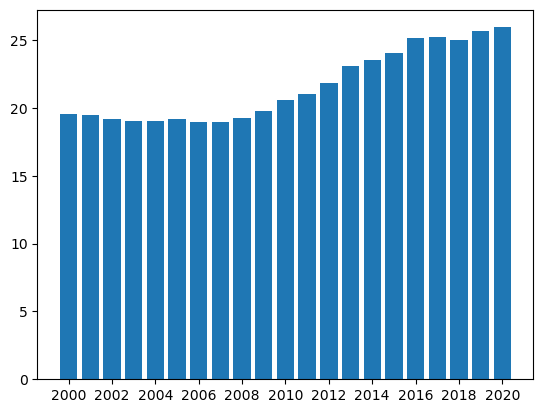

In [8]:
fig, ax1 = plt.subplots()
ax1.bar(avg['year'], avg['comb08'])
ax1.set_xticks(np.arange(2000, 2022, 2));

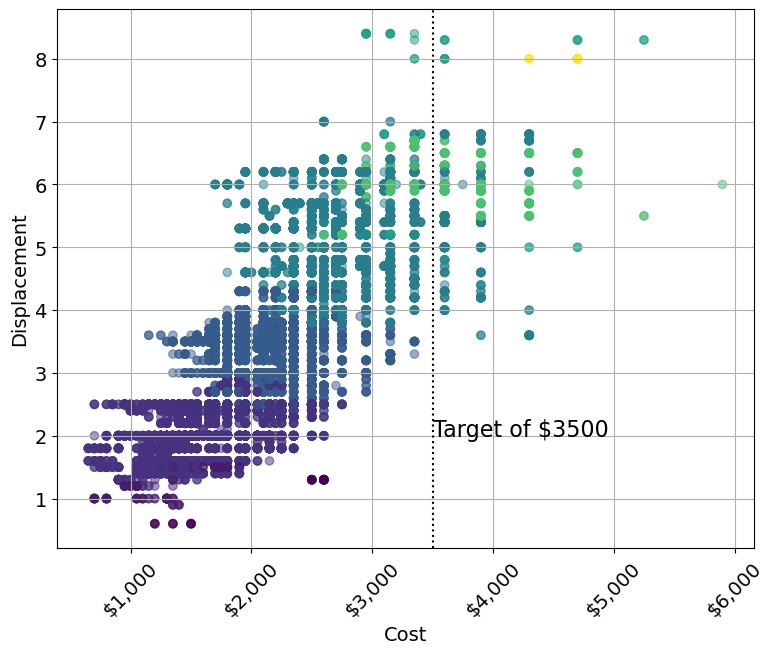

In [9]:
fig, ax1 = plt.subplots(figsize=(9,7))
ax1.scatter(x=df['fuelCost08'], y=df['displ'], alpha=0.5, c=df['cylinders'])
ax1.set_xlabel('Cost', size=14)
ax1.set_ylabel('Displacement', size=14)
ax1.xaxis.set_major_formatter('${x:,.0f}')
ax1.tick_params(axis='x', labelrotation=45, labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.axvline(3500, color='black', linestyle=':')
ax1.annotate('Target of $3500', xy=(3500,2), size=16)
ax1.grid(True);

In [10]:
avg_by_year = df.groupby(['year']).agg({'highway08': 'mean', 
                          'city08': 'mean', 'comb08': 'mean'})
avg_by_year

,highway08,city08,comb08
year,,,
2000,23.414286,17.221429,19.526190
2001,23.328211,17.275521,19.479693
2002,23.030769,16.893333,19.168205
2003,22.836207,16.780651,19.000958
2004,23.064171,16.740642,19.067736
2005,23.297599,16.851630,19.193825
2006,23.048913,16.626812,18.959239
2007,23.083481,16.605684,18.978686
2008,23.455771,16.900590,19.276327


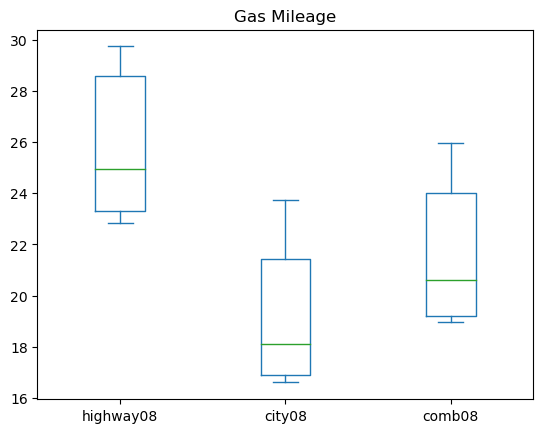

In [11]:
avg_by_year.plot(kind='box',  title='Gas Mileage');

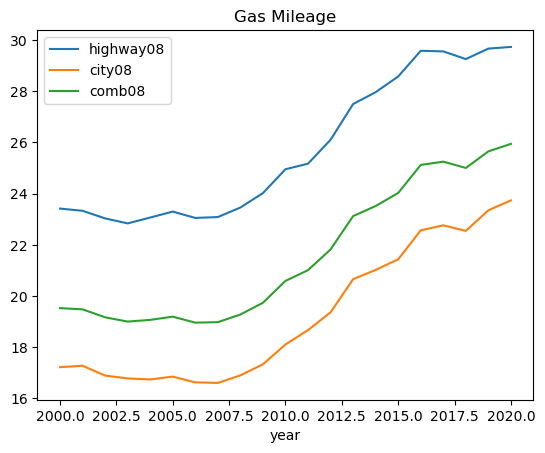

In [12]:
avg_by_year.plot(kind='line',  title='Gas Mileage');

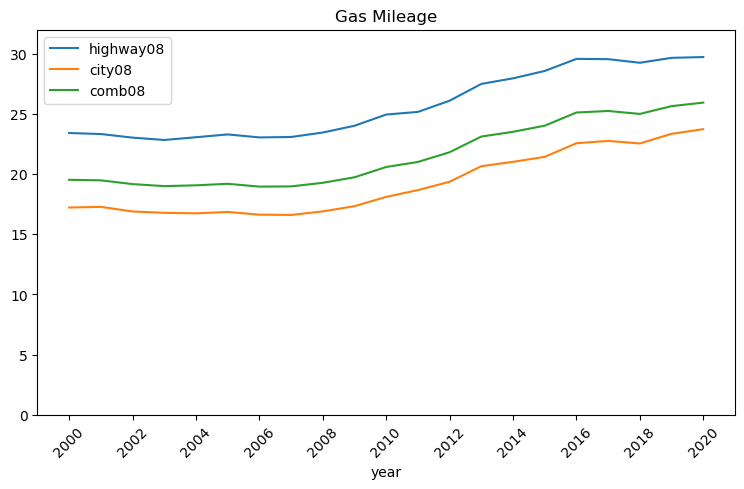

In [13]:
avg_by_year.plot(kind='line', title='Gas Mileage', figsize=(9,5), 
                 xticks=np.arange(2000,2022,2), ylim=(0,32),
                 rot=45);

In [14]:
df['fuelType'].value_counts()

fuelType
Regular                        12069
Premium                         9731
Gasoline or E85                 1339
Diesel                           338
Electricity                      231
Premium or E85                   127
Midgrade                         118
Premium and Electricity           75
Regular Gas and Electricity       52
Premium Gas or Electricity        51
CNG                               47
Gasoline or natural gas           20
Gasoline or propane                8
Regular Gas or Electricity         4
Name: count, dtype: int64

In [15]:
combustion = ['Regular', 'Premium', 'Gasoline or E85', 'Premium or E85', 'Midgrade']
combustion_df = df.query('fuelType == @combustion').copy()

In [16]:
combustion_df.head()

,make,model,year,cylinders,trany,displ,VClass,co2,barrels08,fuelCost08,fuelType,highway08,city08,comb08
0,Acura,NSX,2000,6.0,Automatic 4-spd,3.0,Two Seaters,-1,18.311667,2600,Premium,22,15,18
1,Acura,NSX,2000,6.0,Manual 6-spd,3.2,Two Seaters,-1,18.311667,2600,Premium,22,15,18
2,BMW,M Coupe,2000,6.0,Manual 5-spd,3.2,Two Seaters,-1,17.347895,2500,Premium,23,17,19
3,BMW,Z3 Coupe,2000,6.0,Automatic 4-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19
4,BMW,Z3 Coupe,2000,6.0,Manual 5-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19


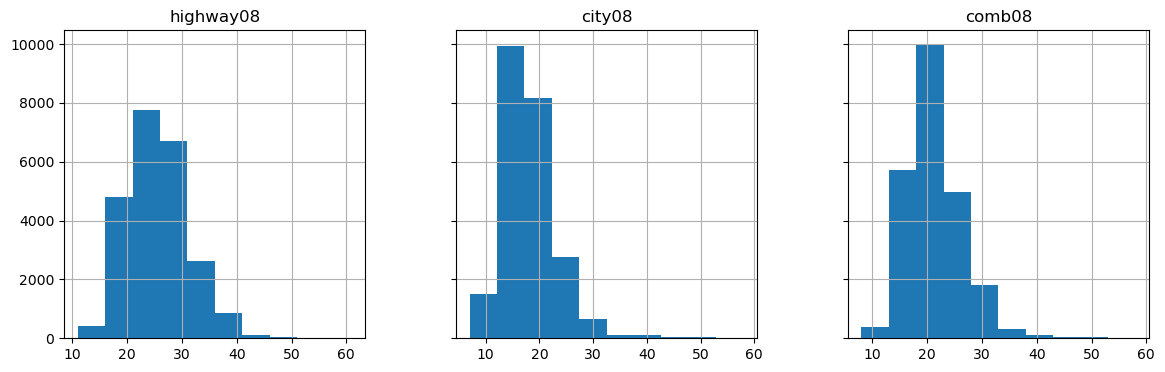

In [17]:
combustion_df.hist(column=['highway08', 
         'city08', 'comb08'], figsize=(14, 4), 
                   sharey=True, layout=(1,3));

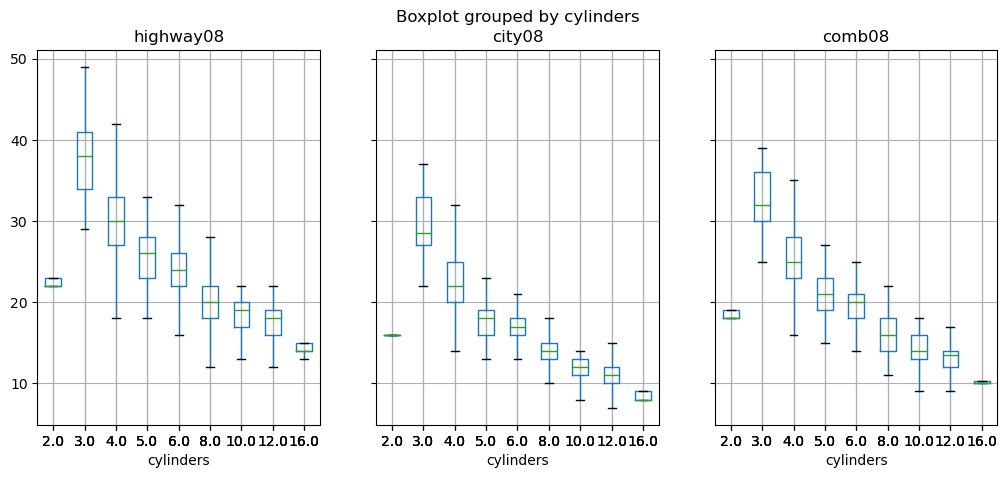

In [18]:
combustion_df.boxplot(column=['highway08', 'city08', 'comb08'], 
                      by='cylinders', figsize=(12,5), layout=(1,3),
                      showfliers=False);

In [19]:
df = pd.read_csv('EPA_fuel_economy_summary.csv')

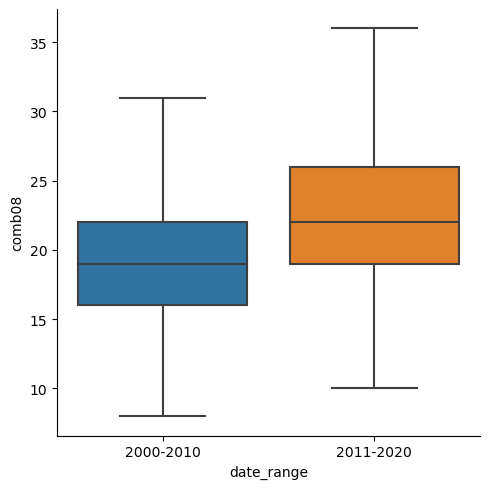

In [20]:
sns.catplot(data=df, 
            x='date_range', 
            y='comb08', 
            kind='box', 
            showfliers=False);

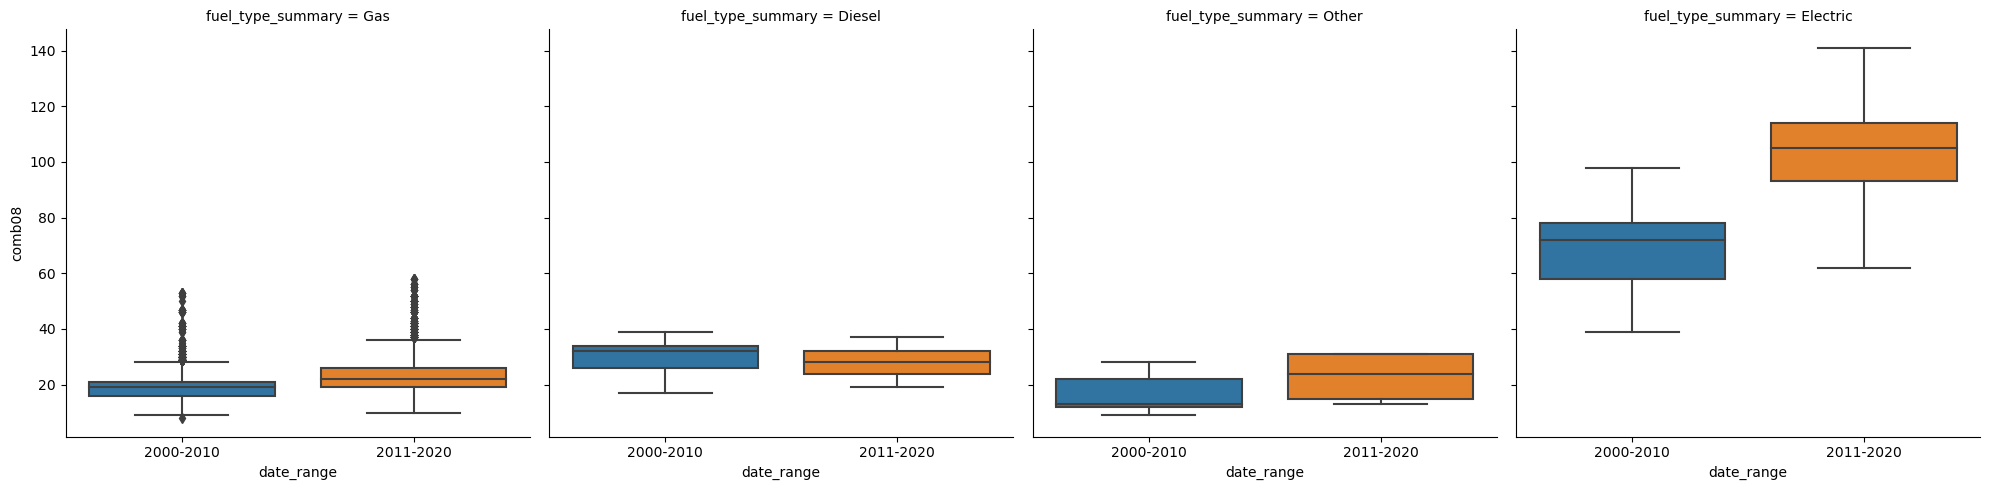

In [21]:
sns.catplot(data=df, 
            x='date_range', 
            y='comb08', 
            col='fuel_type_summary',
            kind='box');

In [22]:
fuel_class = pd.crosstab(df['class_summary'], 
                         df['fuel_type_summary'], 
                         values=df['comb08'], 
                         aggfunc='mean')
fuel_class

fuel_type_summary,Diesel,Electric,Gas,Other
class_summary,,,,
Car,32.891156,106.530864,22.502994,24.500000
Other,22.000000,62.000000,16.970615,12.333333
Pickup,23.133333,57.333333,17.002950,11.888889
SUV,24.216495,84.632653,19.435003,NaN
Wagon,32.818182,111.000000,23.422427,NaN


<Axes: xlabel='fuel_type_summary', ylabel='class_summary'>

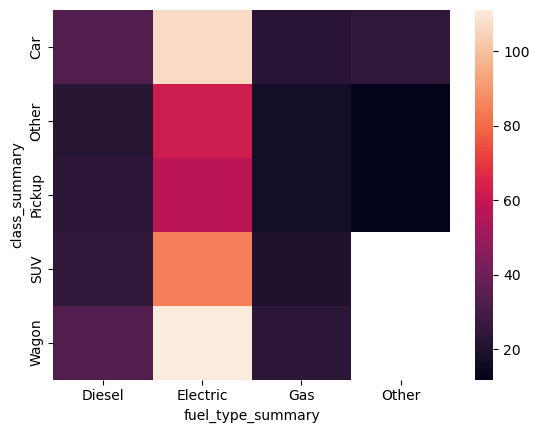

In [23]:
sns.heatmap(fuel_class)

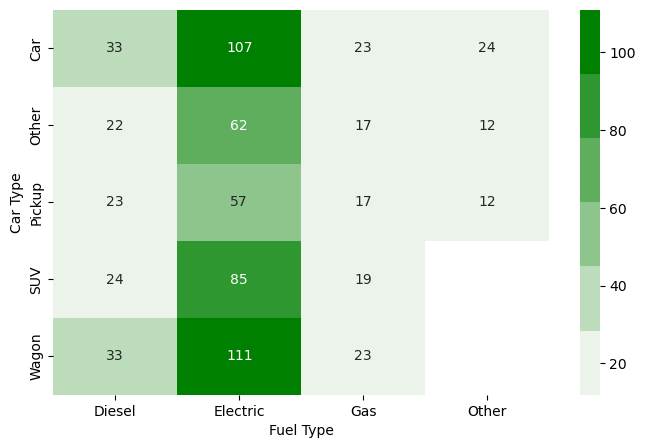

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
custom_cmap_2 = sns.light_palette("green", as_cmap=False)
sns.heatmap(fuel_class, annot=True, fmt='.0f', cmap=custom_cmap_2, ax=ax)
ax.set_ylabel('Car Type')
ax.set_xlabel('Fuel Type');

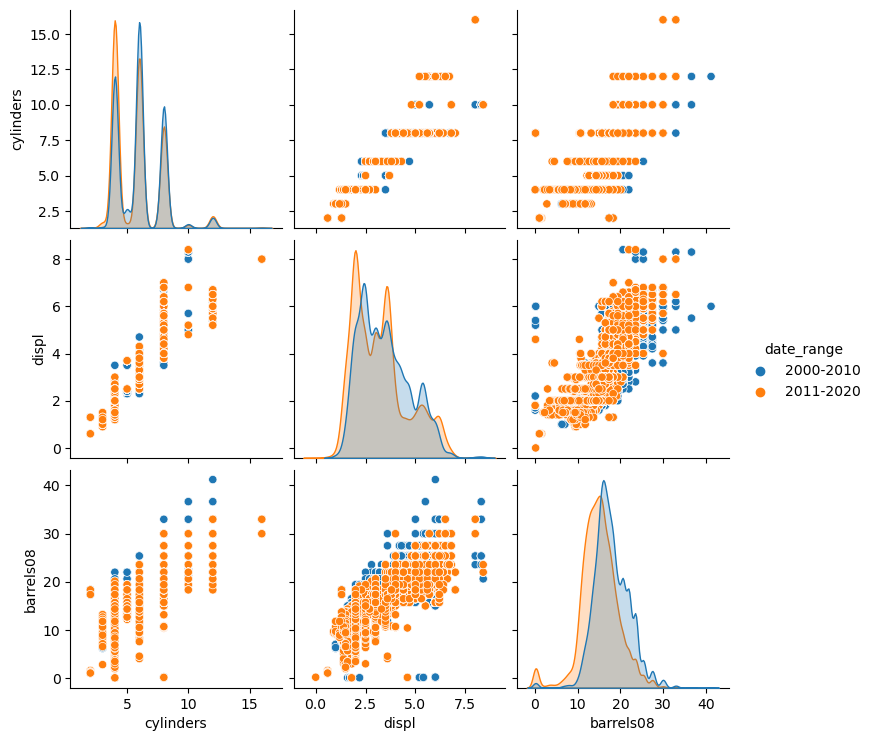

In [25]:
sns.pairplot(df, 
             x_vars=['cylinders', 'displ', 'barrels08'], 
             y_vars=['cylinders', 'displ', 'barrels08'],
             hue='date_range')

<div style=" padding: 40px; text-align: left; color: #535453;">
    Notebook by:
    <h2 style="font-family: 'calibri', sans-serif;ext-align: center;  font-size: 50px; margin-top: 0; margin-bottom: 20px;">
    Elyas Najafi
    </h2>
</div>

<h1 style="padding-top:50px;"><p style="background-color:#000;font-family:calibri;color:#FFF9ED;font-size:150%;text-align:center;border-radius:20px;">
Thanks For Your Attention
</p></h1>